In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
file_path = "/Users/faisalmahmud/Library/CloudStorage/OneDrive-UniversityofPlymouth/PhD/Chapter/P2_reallife/DASS/FinalDataAnqi/FiveClassesDefault/Preprocessing/Corrected_Unscaled_thought_personality_combined.csv"
data = pd.read_csv(file_path)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5063 entries, 0 to 5062
Data columns (total 48 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   participant_code    5063 non-null   object 
 1   date                5063 non-null   object 
 2   start_time          5063 non-null   object 
 3   end_time            5063 non-null   object 
 4   Duration_in_Second  5063 non-null   int64  
 5   notification_time   5063 non-null   object 
 6   Task                5063 non-null   int64  
 7   Future              5063 non-null   int64  
 8   Past                5063 non-null   int64  
 9   Self                5063 non-null   int64  
 10  People              5063 non-null   int64  
 11  Emotion             5063 non-null   int64  
 12  External            5063 non-null   int64  
 13  Images              5063 non-null   int64  
 14  Words               5063 non-null   int64  
 15  Sounds              5063 non-null   int64  
 16  Detail


📊 Total instances per class BEFORE splitting:
DASS_total_Class:
 DASS_total_Class
0    1647
1     817
2    1038
3     816
4     745
Name: count, dtype: int64

📊 Total instances per class in TRAIN dataset:
DASS_total_Class
0    1317
1     654
2     830
3     653
4     596
Name: count, dtype: int64

📊 Total instances per class in TEST dataset:
DASS_total_Class
0    330
1    163
2    208
3    163
4    149
Name: count, dtype: int64

✅ Train dataset saved to: /Users/faisalmahmud/Library/CloudStorage/OneDrive-UniversityofPlymouth/PhD/Chapter/P2_reallife/DASS/FinalDataAnqi/FiveClassesDefault/FinalData/DASS_TrainData_5class.csv (Size: 4050)
✅ Test dataset saved to: /Users/faisalmahmud/Library/CloudStorage/OneDrive-UniversityofPlymouth/PhD/Chapter/P2_reallife/DASS/FinalDataAnqi/FiveClassesDefault/FinalData/DASS_TestData_5class.csv (Size: 1013)


/var/folders/4t/x7jmzq5d7sb416lmlhyhrjpw0000gn/T/ipykernel_40401/801605223.py:108: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, palette='Set2')


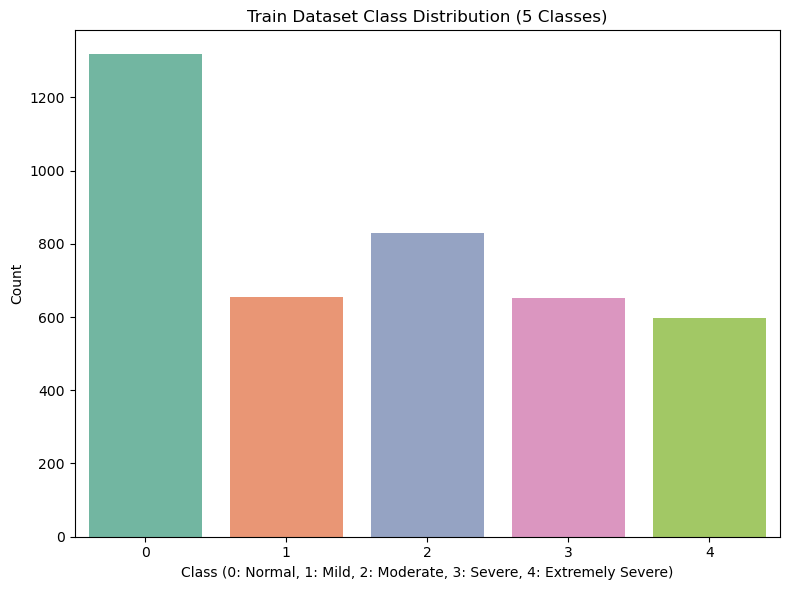

/var/folders/4t/x7jmzq5d7sb416lmlhyhrjpw0000gn/T/ipykernel_40401/801605223.py:108: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, palette='Set2')


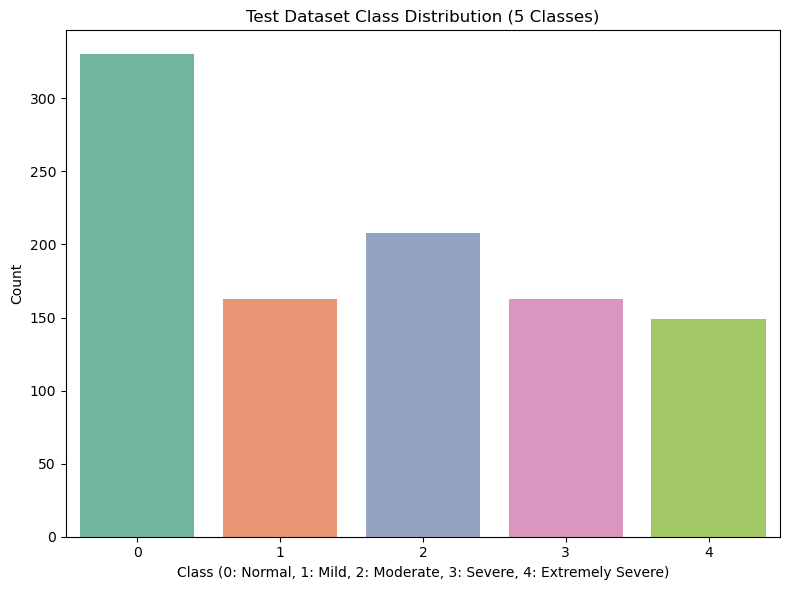

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Load dataset
file_path = "/Users/faisalmahmud/Library/CloudStorage/OneDrive-UniversityofPlymouth/PhD/Chapter/P2_reallife/DASS/FinalDataAnqi/FiveClassesDefault/Preprocessing/Corrected_Unscaled_thought_personality_combined.csv"
data = pd.read_csv(file_path)

# ----------------------------
# 🔢 5-Class Classification
# ----------------------------

def classify_depression(value):
    if value <= 9:
        return 0  # Normal
    elif value <= 13:
        return 1  # Mild
    elif value <= 20:
        return 2  # Moderate
    elif value <= 27:
        return 3  # Severe
    else:
        return 4  # Extremely Severe

def classify_anxiety(value):
    if value <= 7:
        return 0
    elif value <= 9:
        return 1
    elif value <= 14:
        return 2
    elif value <= 19:
        return 3
    else:
        return 4

def classify_stress(value):
    if value <= 14:
        return 0
    elif value <= 18:
        return 1
    elif value <= 25:
        return 2
    elif value <= 33:
        return 3
    else:
        return 4

def classify_dass_total(value):
    if value <= 30:  # 9+7+14
        return 0
    elif value <= 40:  # Rough estimate for Mild
        return 1
    elif value <= 59:
        return 2
    elif value <= 79:
        return 3
    else:
        return 4

# Apply classification
data['DASS_D_Class'] = data['DASS_D'].apply(classify_depression)
data['DASS_A_Class'] = data['DASS_A'].apply(classify_anxiety)
data['DASS_S_Class'] = data['DASS_S'].apply(classify_stress)
data['DASS_total_Class'] = data['DASS_total'].apply(classify_dass_total)

# ----------------------------
# 📊 Class Distribution Before Split
# ----------------------------
print("\n📊 Total instances per class BEFORE splitting:")
print("DASS_total_Class:\n", data['DASS_total_Class'].value_counts().sort_index())

# ----------------------------
# 📤 Train-Test Split
# ----------------------------
train_data, test_data = train_test_split(
    data, test_size=0.2, stratify=data[['DASS_total_Class']], random_state=42
)

print("\n📊 Total instances per class in TRAIN dataset:")
print(train_data['DASS_total_Class'].value_counts().sort_index())

print("\n📊 Total instances per class in TEST dataset:")
print(test_data['DASS_total_Class'].value_counts().sort_index())

# ----------------------------
# 💾 Save Datasets
# ----------------------------
output_dir = "/Users/faisalmahmud/Library/CloudStorage/OneDrive-UniversityofPlymouth/PhD/Chapter/P2_reallife/DASS/FinalDataAnqi/FiveClassesDefault/FinalData"
os.makedirs(output_dir, exist_ok=True)

train_output_file = os.path.join(output_dir, "DASS_TrainData_5class.csv")
test_output_file = os.path.join(output_dir, "DASS_TestData_5class.csv")

train_data.to_csv(train_output_file, index=False)
test_data.to_csv(test_output_file, index=False)

print(f"\n✅ Train dataset saved to: {train_output_file} (Size: {len(train_data)})")
print(f"✅ Test dataset saved to: {test_output_file} (Size: {len(test_data)})")

# ----------------------------
# 📊 Class Distribution Plots
# ----------------------------
def plot_class_distribution(column, title):
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, palette='Set2')
    plt.title(title)
    plt.xlabel('Class (0: Normal, 1: Mild, 2: Moderate, 3: Severe, 4: Extremely Severe)')
    plt.ylabel('Count')
    plt.xticks([0, 1, 2, 3, 4])
    plt.tight_layout()
    plt.show()

plot_class_distribution(train_data['DASS_total_Class'], 'Train Dataset Class Distribution (5 Classes)')
plot_class_distribution(test_data['DASS_total_Class'], 'Test Dataset Class Distribution (5 Classes)')

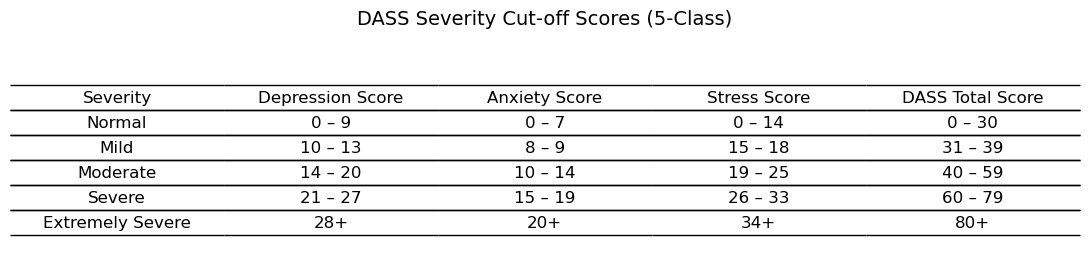

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

# Data for the severity chart including DASS Total
data = {
    "Severity": ["Normal", "Mild", "Moderate", "Severe", "Extremely Severe"],
    "Depression Score": ["0 – 9", "10 – 13", "14 – 20", "21 – 27", "28+"],
    "Anxiety Score": ["0 – 7", "8 – 9", "10 – 14", "15 – 19", "20+"],
    "Stress Score": ["0 – 14", "15 – 18", "19 – 25", "26 – 33", "34+"],
    "DASS Total Score": ["0 – 30", "31 – 39", "40 – 59", "60 – 79", "80+"]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Plot as a table
fig, ax = plt.subplots(figsize=(11.5, 2.8))
ax.axis('off')  # Turn off the axes

# Create the table
table = plt.table(cellText=df.values,
                  colLabels=df.columns,
                  cellLoc='center',
                  loc='center',
                  colColours=["lightgrey"] * len(df.columns),
                  edges='horizontal')

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.5)

# Add title
plt.title("DASS Severity Cut-off Scores (5-Class)", fontsize=14, pad=20)
plt.show()

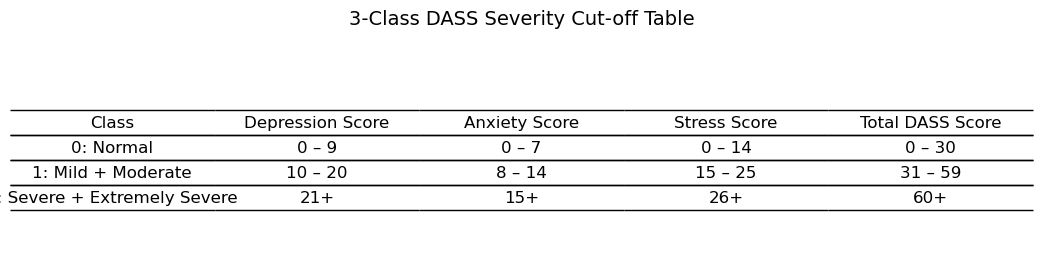

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# Create data for 3-class severity cut-off
data = {
    "Class": ["0: Normal", "1: Mild + Moderate", "2: Severe + Extremely Severe"],
    "Depression Score": ["0 – 9", "10 – 20", "21+"],
    "Anxiety Score": ["0 – 7", "8 – 14", "15+"],
    "Stress Score": ["0 – 14", "15 – 25", "26+"],
    "Total DASS Score": ["0 – 30", "31 – 59", "60+"]
}

# Create DataFrame
df = pd.DataFrame(data)

# Plot as a table
fig, ax = plt.subplots(figsize=(11, 2.8))
ax.axis('off')  # Turn off axes

# Create table with centered cells
table = plt.table(cellText=df.values,
                  colLabels=df.columns,
                  cellLoc='center',
                  loc='center',
                  colColours=["lightgrey"] * len(df.columns),
                  edges='horizontal')

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.5)

# Add title
plt.title("3-Class DASS Severity Cut-off Table", fontsize=14, pad=20)
plt.show()

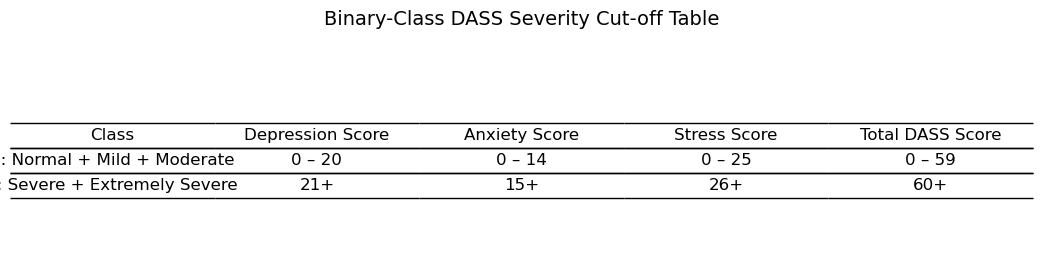

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Create data for binary-class severity cut-off
data = {
    "Class": ["0: Normal + Mild + Moderate", "1: Severe + Extremely Severe"],
    "Depression Score": ["0 – 20", "21+"],
    "Anxiety Score": ["0 – 14", "15+"],
    "Stress Score": ["0 – 25", "26+"],
    "Total DASS Score": ["0 – 59", "60+"]
}

# Create DataFrame
df = pd.DataFrame(data)

# Plot as a table
fig, ax = plt.subplots(figsize=(11, 2.8))
ax.axis('off')  # Turn off axes

# Create table with centered cells
table = plt.table(cellText=df.values,
                  colLabels=df.columns,
                  cellLoc='center',
                  loc='center',
                  colColours=["lightgrey"] * len(df.columns),
                  edges='horizontal')

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.5)

# Add title
plt.title("Binary-Class DASS Severity Cut-off Table", fontsize=14, pad=20)
plt.show()